In [137]:
import pandas as pd
import matplotlib.pyplot as plt

ruta_archivo = 'Dadesministeri2019.csv'
datostot = pd.read_csv('Dadesministeri2019.csv')

# Filtrar las filas donde el valor en la columna 'province' sea igual a 8 (Barcelona)
datos = datostot[datostot.iloc[:, 11] == 8]

datos= datos.reset_index(drop=True)




# Definir los valores para la nueva fila
valores= ['Type of accident', 'Gender', 'Nationality', 'Professional situation', 'Main occupation', 'Seniority in the job (months)', 'Seniority in the job (days)', 'Type of contract', 'Social Security Scheme', 'Economic activity of the centre', 'Centre staff', 'Province (victime)', 'Contracts or subcontracts', 'Temporary employment', 'Personal assumption', 'Own service', 'External prevention service', 'Designated workers', 'Pooled service', 'Preventive Org: None', 'Accident location', 'Traffic accident', 'The centre belongs to the company where the worker is affiliated to the Social Security', 'The centre is the same as the centre where the worker is affiliated', 'Contracts or subcontracts the company', 'Temporary employment user', 'Another employer-employee relationship', 'Province (accident place)', 'Centre staff (place)', 'Economic activity of the centre', 'Date of accident', 'Date of medical leave', 'Weekday', 'Time of day', 'Working time', 'Regular job', 'Risk assessment', 'Type of place', 'Type of work', 'Specific physical activity', 'Material agent associated with the physical activity', 'Deviation that triggered the accident', 'Material agent associated with the deviation', 'Form or contact that produced the injury', 'Material agent associated with the form or contact', 'Affected more than one worker', 'Description of injury', 'Degree of injury', 'Part of body injured', 'Type of assistance', 'Hospitalisation', 'Daily amount of benefit', 'Degree of injury (at the time of discharge)', 'Date of medical discharge', 'Medical diagnosis code (at the time of discharge)', 'Duration of sick absence', 'Age', 'Province of the Labour Authority receiving the occupational accident report']  # Reemplaza estos valores con los que desees añadir
datos.columns = valores

# Eliminar las columnas 'Hola' y 'Adios'
datos = datos.drop(columns=['Nationality', 'Seniority in the job (days)'])

datos.loc[datos['Gender'] == 1, 'Gender'] = 'Men'
datos.loc[datos['Gender'] == 2, 'Gender'] = 'Women'

franjas_edad = pd.cut(
    datos['Age'], 
    bins=[16, 30, 60, datos['Age'].max()],  # Definir los límites de las franjas
    labels=['Young (16-30)', 'Adult (31-60)', 'Senior (61+)'],
    right=True  # Incluye el límite superior
)

# Añadir la nueva columna con la franja de edad al DataFrame
datos['Age Group'] = franjas_edad


# Convertir 'Main occupation' a numérico si no lo es
datos['Main occupation'] = pd.to_numeric(datos['Main occupation'], errors='coerce')

# Crear una función que categorice según los valores
def categorize_occupation(code):
    if 100 <= code < 200:
        return 'Managers and Executives'
    elif 200 <= code < 400:
        return 'Scientific and Intellectual Professionals'
    elif 400 <= code < 500:
        return 'Office Workers'
    elif 500 <= code < 1000:
        return 'Operators and Service Workers'
    else:
        return 'Unknown Category'  # En caso de que el código no esté en los rangos esperados

# Aplicar la función de categorización
datos['Main occupation'] = datos['Main occupation'].apply(categorize_occupation)




def categorize_seniority(months):
    if months <= 72:
        return 'Amateur'
    else:
        return 'Senior'

# Aplicar la función a la columna 'Seniority in the job'
datos['Seniority in the job (months)'] = datos['Seniority in the job (months)'].apply(categorize_seniority)

# Ver las primeras filas para comprobar
print(datos[['Seniority in the job (months)', 'Seniority in the job (months)']].head())

def categorize_location(location):
    if location == 1:
        return 'At the usual place of work'
    elif location == 2:
        return 'During a business trip'
    elif location == 3:
        return 'In itinere (commuting)'
    elif location == 4:
        return 'At another workplace'

# Aplicar la función a la columna 'Accident location'
datos['Accident Location'] = datos['Accident location'].apply(categorize_location)

# Ver las primeras filas para comprobar
print(datos[['Accident location', 'Accident Location']].head())

# Definir una función para categorizar la hora del día
def categorizar_hora(hora):
    if 6 <= hora < 14:
        return 'Morning'
    elif 14 <= hora < 22:
        return 'Afternoon'
    else:
        return 'Night'

# Asegurarse de que la columna 'Time of day' sea de tipo int
datos['Time of day'] = datos['Time of day'].apply(categorizar_hora)

# Convertir la columna a cadena de texto (str)
datos['Date of accident'] = datos['Date of accident'].astype(str)

# Agregar ceros a la izquierda si es necesario
datos['Date of accident'] = datos['Date of accident'].apply(lambda x: x.zfill(8))

# Dividir los valores en grupos de día, mes y año, y luego unirlos con el formato 'DDMMAAAA'
datos['Date of accident'] = datos['Date of accident'].str.replace(r'(\d{2})(\d{2})(\d{4})', r'\1\2\3')

# Convertir la columna 'fecha' al formato de fecha
datos['Date of accident'] = pd.to_datetime(datos['Date of accident'], format='%d%m%Y')

# Función para determinar la estación del año
def get_season(date):
    year = date.year
    seasons = {
        'Spring': (pd.Timestamp(f'{year}-03-21'), pd.Timestamp(f'{year}-06-20')),
        'Summer': (pd.Timestamp(f'{year}-06-21'), pd.Timestamp(f'{year}-09-22')),
        'Autumn': (pd.Timestamp(f'{year}-09-23'), pd.Timestamp(f'{year}-12-20')),
        'Winter': (pd.Timestamp(f'{year}-12-21'), pd.Timestamp(f'{year + 1}-03-20'))
    }
    for season, (start, end) in seasons.items():
        if start <= date <= end:
            return season
    return 'Winter'  # This handles dates from Jan 1 to Mar 20

# Aplicar la función a la columna 'Date' y reemplazar los valores con la estación
datos['Date of accident'] = datos['Date of accident'].apply(get_season)

def categorize_company_size(num_workers):
    if num_workers < 50:
        return 'Small'
    elif 50 <= num_workers < 250:
        return 'Medium'
    else:
        return 'Large'

# Aplicar la función para crear una nueva columna categorizada
datos['Centre staff'] = datos['Centre staff'].apply(categorize_company_size)



datos

  Seniority in the job (months) Seniority in the job (months)
0                        Senior                        Senior
1                        Senior                        Senior
2                        Senior                        Senior
3                       Amateur                       Amateur
4                        Senior                        Senior
   Accident location           Accident Location
0                  3      In itinere (commuting)
1                  3      In itinere (commuting)
2                  3      In itinere (commuting)
3                  1  At the usual place of work
4                  1  At the usual place of work


/var/folders/8g/8b6m86bj7_d1544lchs6m6lm0000gn/T/ipykernel_41355/1475085560.py:105: FutureWarning: The default value of regex will change from True to False in a future version.
  datos['Date of accident'] = datos['Date of accident'].str.replace(r'(\d{2})(\d{2})(\d{4})', r'\1\2\3')


,Type of accident,Gender,Professional situation,Main occupation,Seniority in the job (months),Type of contract,Social Security Scheme,Economic activity of the centre,Centre staff,Province (victime),...,Hospitalisation,Daily amount of benefit,Degree of injury (at the time of discharge),Date of medical discharge,Medical diagnosis code (at the time of discharge),Duration of sick absence,Age,Province of the Labour Authority receiving the occupational accident report,Age Group,Accident Location
0,1,Women,1,Operators and Service Workers,Senior,100,1,551,Small,8,...,0,43.05,1,30092019,81342,163,59,8,Adult (31-60),In itinere (commuting)
1,1,Women,1,Office Workers,Senior,100,1,692,Small,8,...,0,34.88,1,10072019,81342,58,61,8,Senior (61+),In itinere (commuting)
2,1,Women,1,Operators and Service Workers,Senior,100,1,801,Large,8,...,0,39.58,1,22032019,8450,5,62,8,Senior (61+),In itinere (commuting)
3,1,Women,1,Operators and Service Workers,Amateur,402,1,871,Medium,8,...,0,33.65,,,,107,59,8,Adult (31-60),At the usual place of work
4,1,Men,1,Operators and Service Workers,Senior,100,1,293,Medium,8,...,0,75.29,1,10072019,8450,10,54,8,Adult (31-60),At the usual place of work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92744,1,Men,1,Operators and Service Workers,Amateur,410,1,463,Large,8,...,0,40.48,,,,6,23,8,Young (16-30),At the usual place of work
92745,1,Men,1,Operators and Service Workers,Amateur,189,1,463,Large,8,...,0,51.89,1,16122019,8730,4,24,8,Young (16-30),At the usual place of work
92746,1,Men,1,Operators and Service Workers,Amateur,402,1,310,Small,8,...,0,32.93,1,27052019,72665,14,29,8,Young (16-30),At the usual place of work
92747,2,Men,1,Operators and Service Workers,Amateur,402,1,310,Small,8,...,0,32.93,1,07062019,72665,11,29,8,Young (16-30),At the usual place of work


In [138]:
import pandas as pd

# Suponiendo que tu DataFrame se llama 'datos' y las columnas son binarias (0 o 1)
# Lista de las columnas preventivas
org_columns = ['Personal assumption', 'Own service', 'External prevention service', 
               'Designated workers', 'Pooled service', 'Preventive Org: None']

# Crear una función para asignar el valor correcto en 'Preventive org'
def assign_preventive_org(row):
    if row['Personal assumption'] == 1:
        return 'Personal assumption'
    elif row['Own service'] == 1:
        return 'Own service'
    elif row['External prevention service'] == 1:
        return 'External prevention service'
    elif row['Designated workers'] == 1:
        return 'Designated workers'
    elif row['Pooled service'] == 1:
        return 'Pooled service'
    elif row['Preventive Org: None'] == 1:
        return 'None'
    else:
        return 'Unknown'  # Por si no hay ninguna opción activa

# Aplicar la función a cada fila del DataFrame
datos['Preventive organisation'] = datos.apply(assign_preventive_org, axis=1)


# Lista de las columnas que quieres eliminar
columns_to_drop = ['Personal assumption', 'Own service', 'External prevention service', 
                   'Designated workers', 'Pooled service', 'Preventive Org: None']

# Eliminar las columnas agrupadas
datos = datos.drop(columns=columns_to_drop)

def categorizar_work(valor):
    if valor in (10, 11, 12, 19):
        return 'Production tasks'
    elif valor in (20, 21, 22, 23, 24, 25, 29):
        return 'Construction'
    elif valor in (30, 31, 32, 33, 34, 35, 39):
        return 'Agri-environmental activities'
    elif valor in (40, 41, 42, 43, 49):
        return 'Business services'
    elif valor in (50, 51, 52, 53, 54, 55, 59):
        return 'Maintenance and security services'
    elif valor in (60, 61, 62, 69):
        return 'Leisure, sport and mobility activities'
    else:
        return 'Others'
    

datos['Type of work'] = datos['Type of work'].apply(categorizar_work)

def categorizar_place(valor):
    if valor in (10, 11, 12, 13, 19):
        return 'Industrial area'
    elif valor in (20, 21, 22, 23, 24, 25, 26, 29):
        return 'Constructions'
    elif valor in (30, 31, 32, 33, 34, 35, 36, 39):
        return 'Agricultural places'
    elif valor in (40, 41, 42, 43, 44, 49):
        return 'Service sector places'
    elif valor in (50, 51, 59):
        return 'Health care centres'
    elif valor in (60, 61, 62, 63, 69):
        return 'Public areas and transport'
    elif valor in (70, 71, 72, 79):
        return 'Addresses'   
    elif valor in (80, 81, 82, 89):
        return 'Sports venues'  
    elif valor in (90, 91, 92, 93, 99):
        return 'High places'
    elif valor in (100, 101, 102, 103, 109):
        return 'Underground places'
    elif valor in (110, 111, 112, 119):
        return 'Underground places'
    else:
        return 'Others'
    

datos['Type of place'] = datos['Type of place'].apply(categorizar_place)




/var/folders/8g/8b6m86bj7_d1544lchs6m6lm0000gn/T/ipykernel_41355/2956923580.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Type of work'] = datos['Type of work'].apply(categorizar_work)
/var/folders/8g/8b6m86bj7_d1544lchs6m6lm0000gn/T/ipykernel_41355/2956923580.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Type of place'] = datos['Type of place'].apply(categorizar_place)


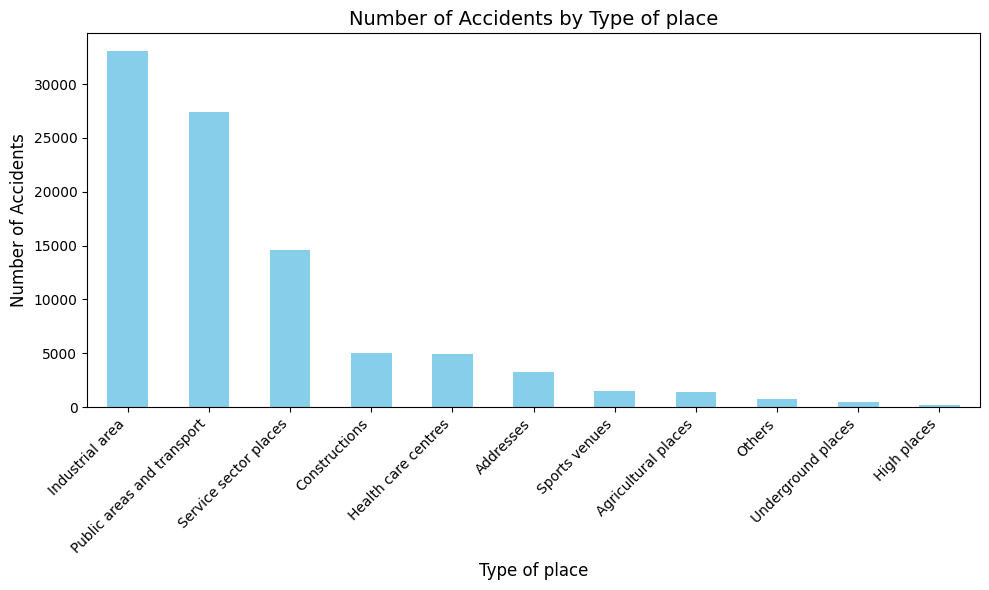

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar el número de accidentes por cada valor en la columna 'Preventive org'
accidentsplace = datos['Type of place'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
accidentsplace.plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.title('Number of Accidents by Type of place', fontsize=14)
plt.xlabel('Type of place', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Rotar etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


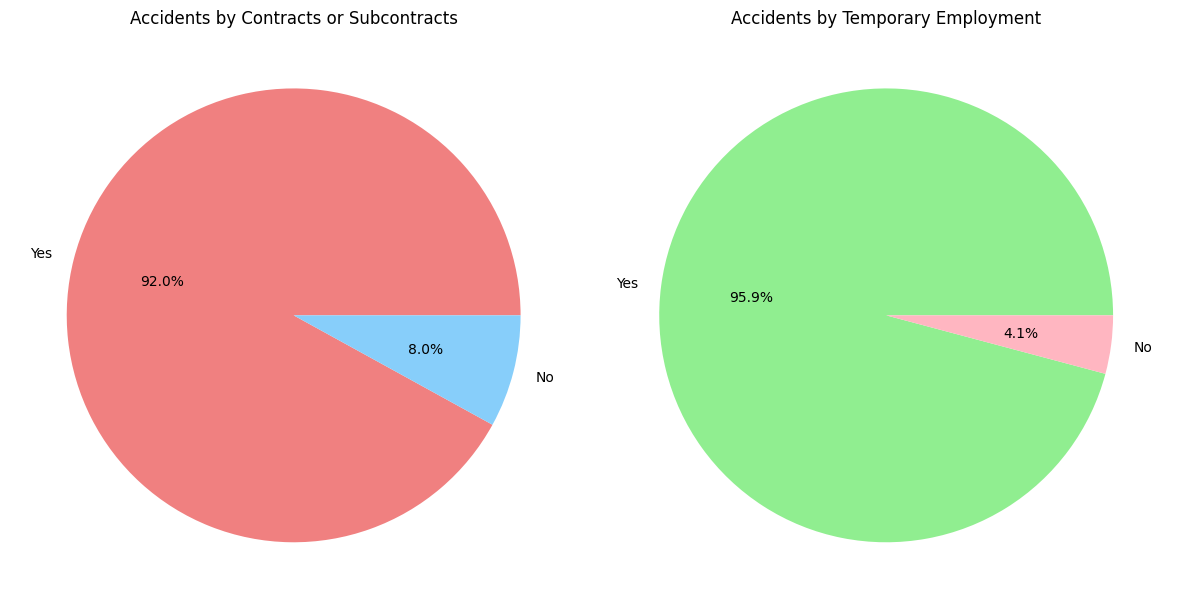

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame 'datos' con las columnas 'Contracts or subcontracts' y 'Temporary employment'

# Graficar gráfico de quesos para 'Contracts or subcontracts'
contracts_counts = datos['Contracts or subcontracts'].value_counts()

# Graficar gráfico de quesos para 'Temporary employment'
temporary_counts = datos['Temporary employment'].value_counts()

# Crear gráficos de quesos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de 'Contracts or subcontracts'
axes[0].pie(contracts_counts, labels=['Yes', 'No'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
axes[0].set_title('Accidents by Contracts or Subcontracts')

# Gráfico de 'Temporary employment'
axes[1].pie(temporary_counts, labels=['Yes', 'No'], autopct='%1.1f%%', colors=['lightgreen', 'lightpink'])
axes[1].set_title('Accidents by Temporary Employment')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


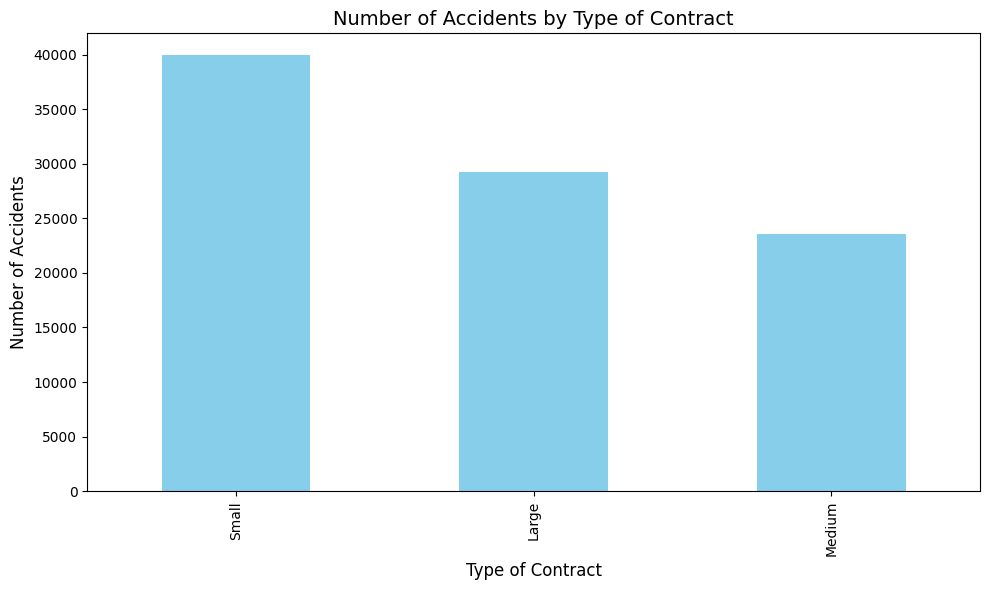

In [141]:

# Contar el número de accidentes por cada tipo de contrato
contract_counts = datos['Centre staff'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
contract_counts.plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.title('Number of Accidents by Type of Contract', fontsize=14)
plt.xlabel('Type of Contract', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


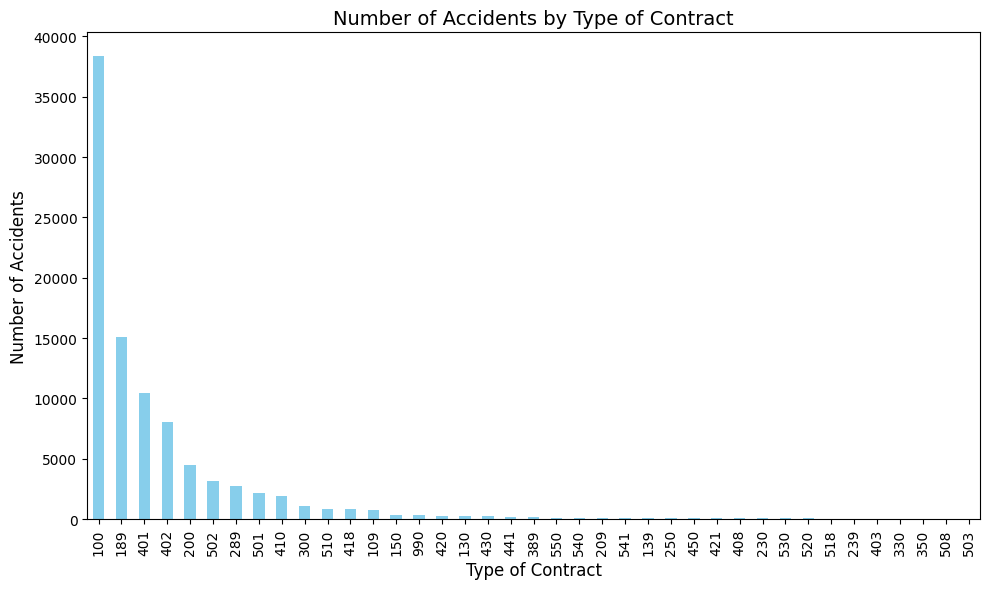

In [142]:
# Contar el número de accidentes por cada tipo de contrato
contract_counts = datos['Type of contract'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
contract_counts.plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.title('Number of Accidents by Type of Contract', fontsize=14)
plt.xlabel('Type of Contract', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

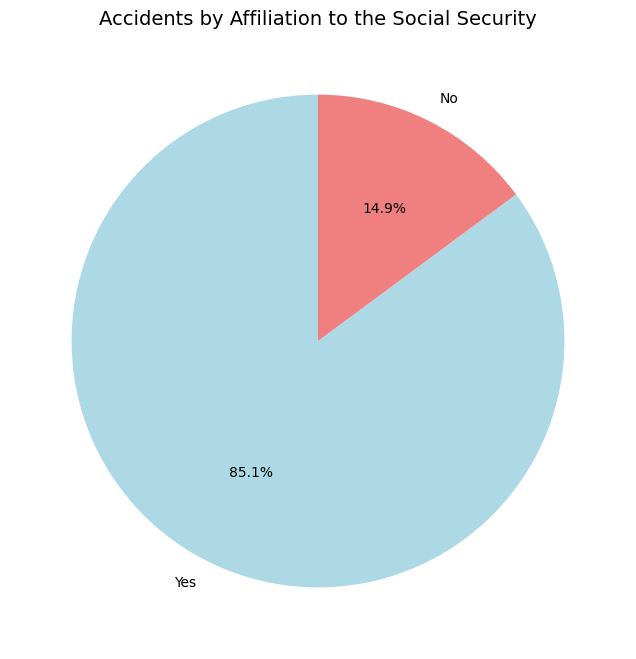

In [143]:
# Reemplaza el nombre exacto de la columna aquí
centre_counts = datos['The centre belongs to the company where the worker is affiliated to the Social Security'].value_counts()

# Crear gráfico de quesos
plt.figure(figsize=(8, 8))
plt.pie(centre_counts, labels=['Yes', 'No'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Añadir título
plt.title('Accidents by Affiliation to the Social Security', fontsize=14)

# Mostrar el gráfico
plt.show()


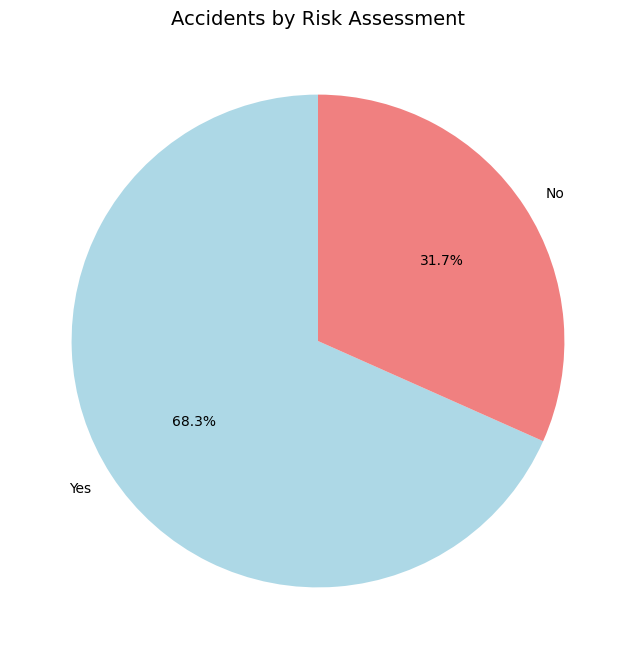

In [144]:
risk_counts = datos['Risk assessment'].value_counts()

# Crear gráfico de quesos
plt.figure(figsize=(8, 8))
plt.pie(risk_counts, labels=['Yes', 'No'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Añadir título
plt.title('Accidents by Risk Assessment', fontsize=14)

# Mostrar el gráfico
plt.show()

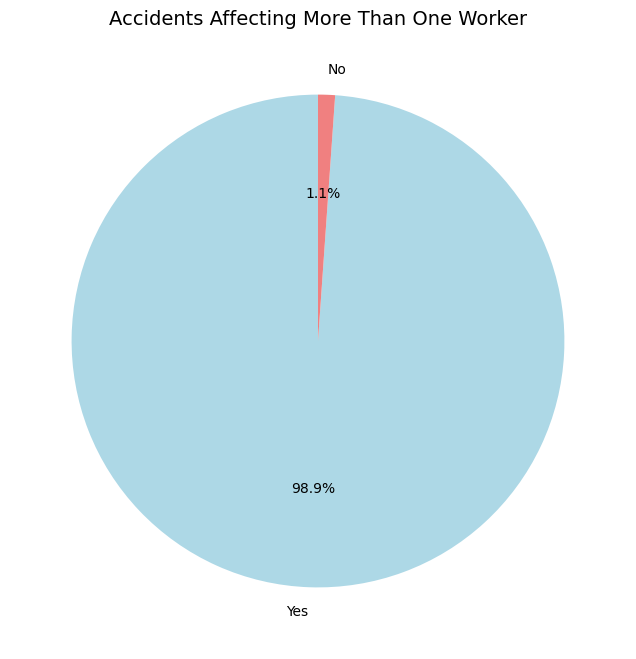

In [145]:


# Contar el número de accidentes por valor de 'Affected more than one worker'
affected_counts = datos['Affected more than one worker'].value_counts()

# Crear gráfico de quesos
plt.figure(figsize=(8, 8))
plt.pie(affected_counts, labels=['Yes', 'No'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Añadir título
plt.title('Accidents Affecting More Than One Worker', fontsize=14)

# Mostrar el gráfico
plt.show()


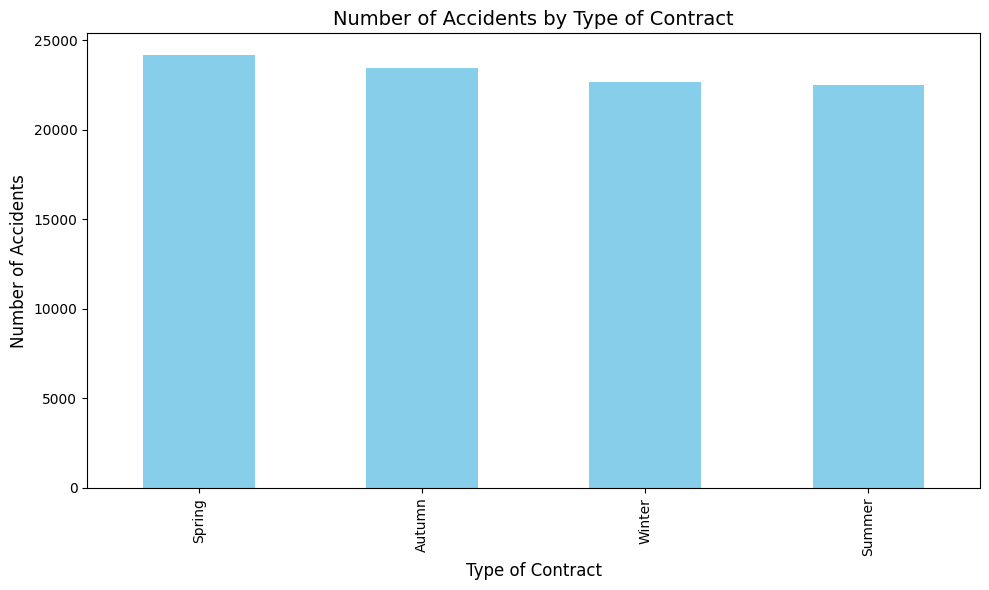

In [146]:
# Contar el número de accidentes por cada tipo de contrato
contract_counts = datos['Date of accident'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
contract_counts.plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.title('Number of Accidents by Type of Contract', fontsize=14)
plt.xlabel('Type of Contract', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

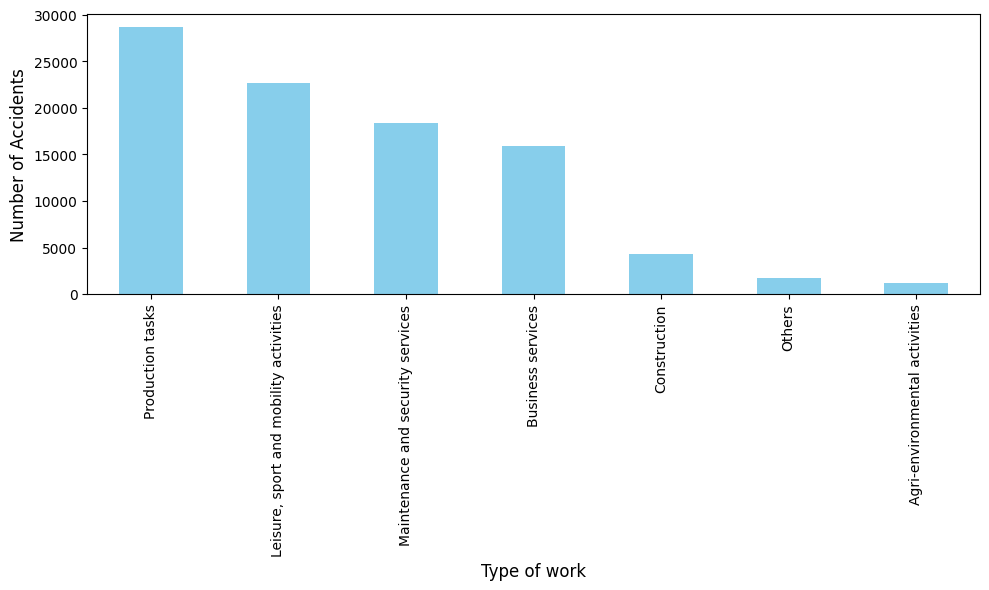

In [147]:
# Contar el número de accidentes por cada tipo de contrato
contract_counts = datos['Type of work'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
contract_counts.plot(kind='bar', color='skyblue')

# Añadir etiquetas y título

plt.xlabel('Type of work', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [148]:

# Seleccionar las columnas deseadas
columns_to_save = ['Gender', 'Age Group', 'Main occupation', 'Seniority in the job (months)', 
                   'Centre staff', 'Time of day', 'Preventive organisation', 'Type of place', 'Type of work']

# Crear un nuevo DataFrame con solo esas columnas
new_df = datos[columns_to_save]

# Guardar en un nuevo archivo de Excel
new_df.to_excel('selected_columns_data9.xlsx', index=False)

print("Archivo guardado con las columnas seleccionadas.")

Archivo guardado con las columnas seleccionadas.


In [149]:

# Seleccionar las columnas deseadas
columns_to_save = ['Gender', 'Age Group', 'Main occupation', 'Seniority in the job (months)', 
                   'Centre staff', 'Time of day', 'Preventive organisation', 'Type of place']
# Crear un nuevo DataFrame con solo esas columnas
new_df = datos[columns_to_save]

# Guardar en un nuevo archivo de Excel
new_df.to_excel('selected_columns_data8.xlsx', index=False)

print("Archivo guardado con las columnas seleccionadas.")

Archivo guardado con las columnas seleccionadas.


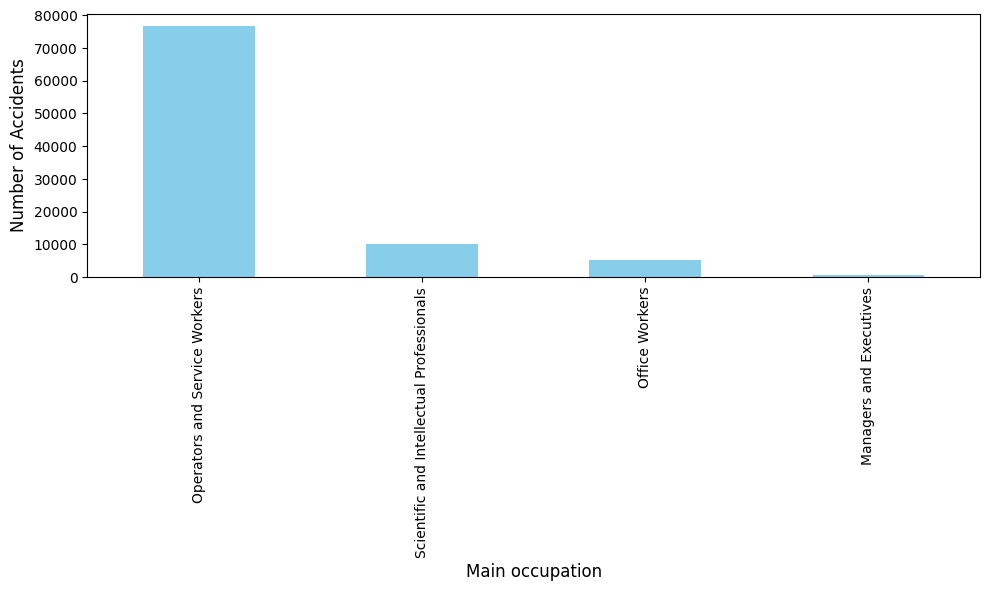

In [150]:
# Contar el número de accidentes por cada tipo de contrato
contract_counts = datos['Main occupation'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
contract_counts.plot(kind='bar', color='skyblue')

# Añadir etiquetas y título

plt.xlabel('Main occupation', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

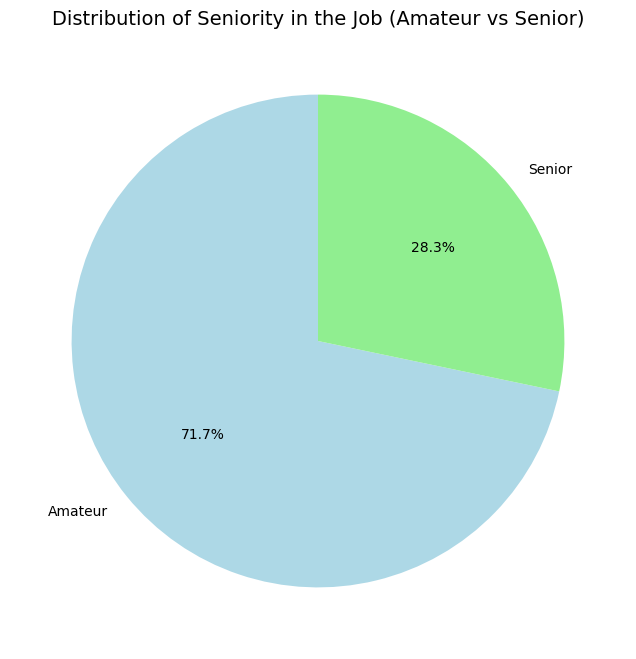

66520


In [151]:
seniority_counts = datos['Seniority in the job (months)'].value_counts()

# Crear gráfico de quesos
plt.figure(figsize=(8, 8))
plt.pie(seniority_counts, labels=seniority_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])

# Añadir título
plt.title('Distribution of Seniority in the Job (Amateur vs Senior)', fontsize=14)

# Mostrar el gráfico
plt.show()
amateur_count = datos['Seniority in the job (months)'].value_counts().get('Amateur', 0)

# Mostrar el resultado
print(amateur_count)

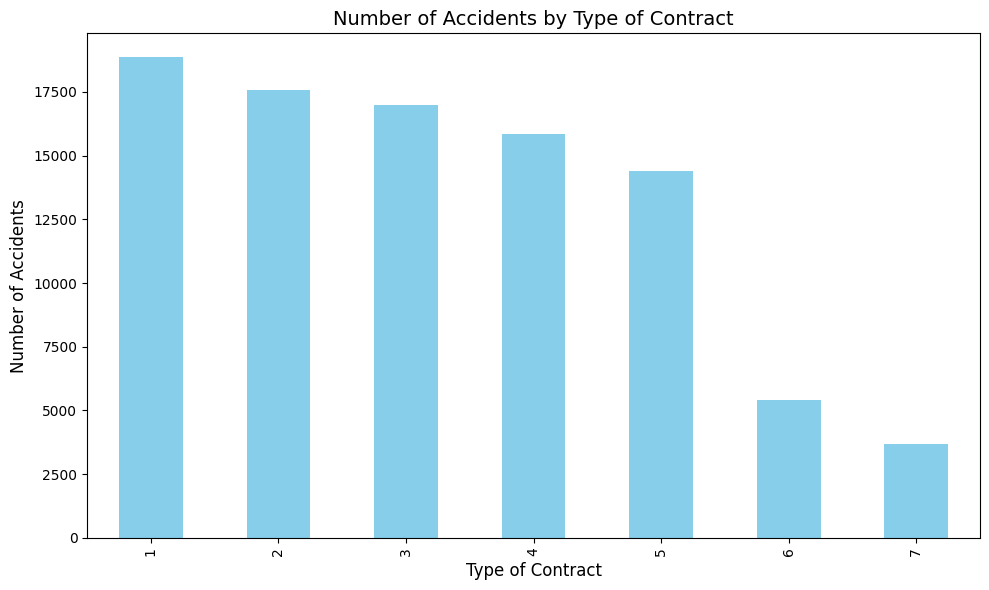

In [152]:
# Contar el número de accidentes por cada tipo de contrato
contract_counts = datos['Weekday'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
contract_counts.plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.title('Number of Accidents by Type of Contract', fontsize=14)
plt.xlabel('Type of Contract', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

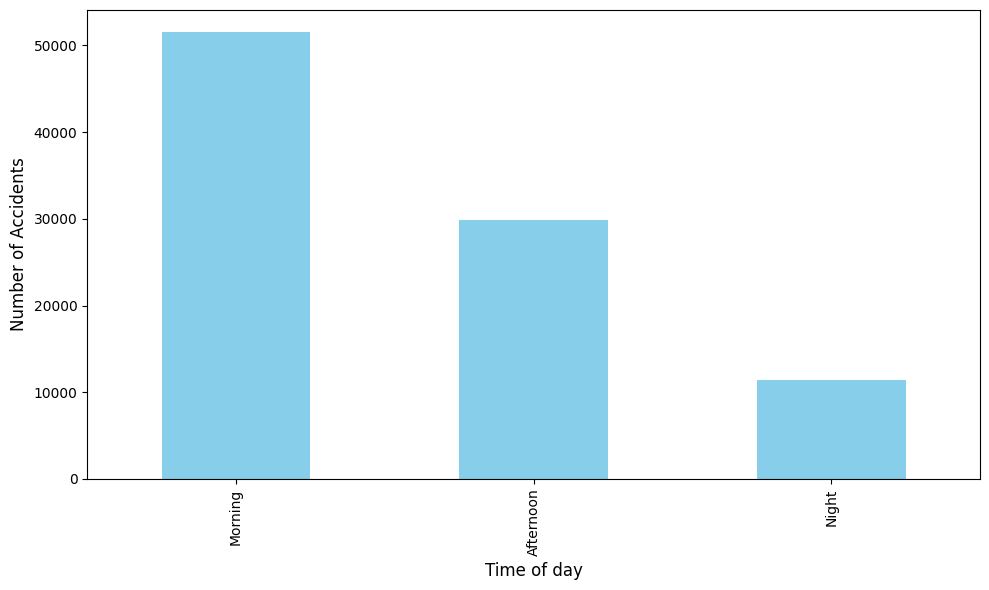

In [153]:

# Contar el número de accidentes por cada tipo de contrato
day_counts = datos['Time of day'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Time of day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

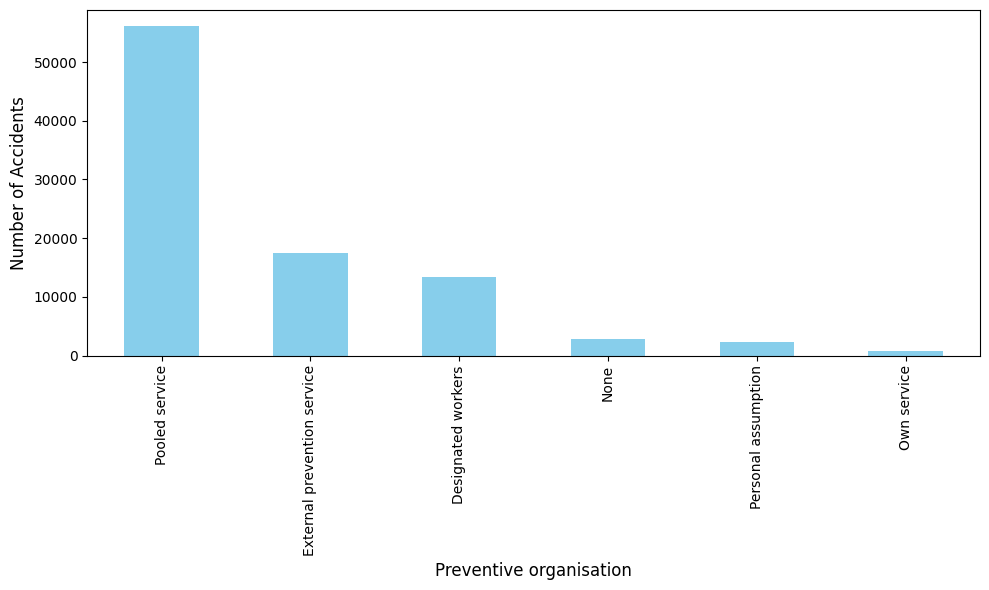

In [156]:
# Contar el número de accidentes por cada tipo de contrato
prev_counts = datos['Preventive organisation'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
prev_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Preventive organisation', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()